In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
# Coadapt baseline
file_list = [
    "comp256/FISTA_fnorm1e-4/",
    "comp256/concreteslab_gs_iwae2/",
    "comp256/concreteslab_st_iwae2/",
    "comp256/concreteslab_gr_iwae2/",
    "comp256/gaussian_iwae/",
    "comp256/gaussian_thresh_st_iwae/",
    "comp256/gaussian_thresh_iwae/",
    "comp256/laplacian_iwae/",
    "comp256/laplacian_thresh_st_iwae/",
    "comp256/laplacian_thresh_iwae/",
]

file_labels = [
    "FISTA",
    "CS Gumbel Softmax",
    "CS Straight-through",
    "CS Gumbel Rao",
    "Gaussian",
    "Thresholded Gaussian SG",
    "Thresholded Gaussian",
    "Laplacian",
    "Thresholded Laplacian SG",
    "Thresholded Laplacian",
]

# Coadapt baseline
file_list = [
    "results/concreteslab_1samp/",
    "results/concreteslab_20samp/",
]

file_labels = [
    "CS 1 Samp",
    "CS 20 Samp",
]

training_step = "train_savefile.npz"
val_true_recon = {}
val_recon = {} 
val_l1 = {} 
val_iwae_loss = {}
val_true_l1 = {}
val_kl_loss = {} 
coeff_est = {} 
coeff_true = {}
num_true_supp = {}
num_redundant_supp = {}
est_active_coeff = {}
true_active_coeff = {}
classification_acc = {}
dictionary_use_dict = {}

multi_info = {}
stat_step = {}
posterior_collapse = {}
coeff_collapse = {}

In [15]:
for idx, file in enumerate(file_list):
    data_file = np.load(file + training_step)
    val_true_recon[file_labels[idx]] = data_file['val_true_recon']
    val_recon[file_labels[idx]] = data_file['val_recon']
    val_l1[file_labels[idx]] = data_file['val_l1']
    val_true_l1[file_labels[idx]] = data_file['val_true_l1']
    val_kl_loss[file_labels[idx]] = data_file['val_kl_loss']
    val_iwae_loss[file_labels[idx]] = data_file['val_iwae_loss']
    coeff_est[file_labels[idx]] = data_file['coeff_est']
    coeff_true[file_labels[idx]] = data_file['coeff_true']
    num_true_supp[file_labels[idx]] = np.zeros(len(coeff_true[file_labels[idx]]))
    num_redundant_supp[file_labels[idx]] = np.zeros(len(coeff_true[file_labels[idx]]))
    true_active_coeff[file_labels[idx]] = np.zeros(len(coeff_true[file_labels[idx]]))
    est_active_coeff[file_labels[idx]] = np.zeros(len(coeff_true[file_labels[idx]]))   
    classification_acc[file_labels[idx]] = np.zeros(len(coeff_true[file_labels[idx]]))    
    dictionary_use_dict[file_labels[idx]] = data_file['dictionary_use']

    for i in range(len(coeff_true[file_labels[idx]])):
        for j in range(coeff_true[file_labels[idx]].shape[1]):
            true_sup = np.nonzero(coeff_true[file_labels[idx]][i, j])[0]
            est_sup = np.nonzero(coeff_est[file_labels[idx]][i, j])[0]
            missed_support = np.setdiff1d(true_sup, est_sup)
            excess_support = np.setdiff1d(est_sup, true_sup)
            true_active_coeff[file_labels[idx]][i] += len(true_sup) / coeff_true[file_labels[idx]].shape[2]
            est_active_coeff[file_labels[idx]][i] += len(est_sup) / coeff_est[file_labels[idx]].shape[2]
            num_true_supp[file_labels[idx]][i] += (1 - (len(missed_support) / coeff_est[file_labels[idx]].shape[2]))
            num_redundant_supp[file_labels[idx]][i] += (len(excess_support) / coeff_est[file_labels[idx]].shape[2])
            classification_acc[file_labels[idx]][i] += (coeff_est[file_labels[idx]].shape[2] - len(missed_support) - len(excess_support)) 
        true_active_coeff[file_labels[idx]][i] /= coeff_true[file_labels[idx]].shape[1]
        est_active_coeff[file_labels[idx]][i] /= coeff_est[file_labels[idx]].shape[1]
        num_true_supp[file_labels[idx]][i] /= coeff_true[file_labels[idx]].shape[1]
        num_redundant_supp[file_labels[idx]][i] /= coeff_est[file_labels[idx]].shape[1]
        classification_acc[file_labels[idx]][i] /= (coeff_est[file_labels[idx]].shape[1] * coeff_est[file_labels[idx]].shape[2])

    stat_file = np.load(file + 'encoder_statistics.npz')
    multi_info[file_labels[idx]] = stat_file['multi_info']
    posterior_collapse[file_labels[idx]] = stat_file['posterior_collapse']
    coeff_collapse[file_labels[idx]] = stat_file['coeff_collapse']    
    stat_step[file_labels[idx]] = stat_file['load_list']
    #stat_step[file_labels[idx]] = list(range(0, 299, 20)) + [299]

FISTA: val loss: 5.953E+01, iwae: 0.000E+00, MI: 6.777E+01
CS Gumbel Softmax: val loss: 1.424E+02, iwae: 1.092E+00, MI: 2.876E+02
CS Straight-through: val loss: 1.426E+02, iwae: 1.092E+00, MI: 1.717E+02
CS Gumbel Rao: val loss: 3.082E+02, iwae: 9.656E-01, MI: 4.766E+02
Gaussian: val loss: 5.675E+02, iwae: 8.115E-01, MI: 7.325E+02
Thresholded Gaussian: val loss: 1.481E+02, iwae: 1.025E+00, MI: 2.336E+02
Thresholded Gaussian SG: val loss: 1.714E+02, iwae: 1.773E+00, MI: 2.935E+02
Laplacian: val loss: 2.566E+02, iwae: 8.243E-01, MI: 5.295E+02
Thresholded Laplacian SG: val loss: 1.367E+02, iwae: 1.006E+00, MI: 1.244E+02
Thresholded Laplacian: val loss: 1.249E+02, iwae: 1.820E+00, MI: 1.766E+02


Text(0, 0.5, 'Redundancy Reduction')

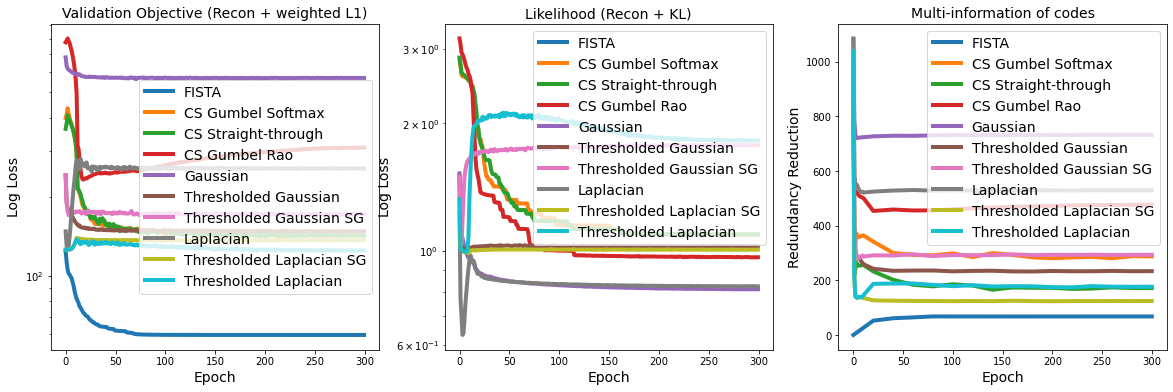

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for idx, label in enumerate(file_labels):
    #    ax[0].semilogy(val_true_recon["Thresholded Gaussian"] + 0.2 * val_true_l1["Thresholded Gaussian"], linewidth=4, label="FISTA")
    #    ax[1].plot(np.zeros(len(val_iwae_loss[label])), linewidth=4, label="FISTA")
    #    ax[2].plot(stat_step[label], 4.706e+02 * np.ones(len(multi_info[label])), linewidth=4, label="FISTA")

    ax[1].semilogy(val_iwae_loss[label], linewidth=4, label=label)
    ax[0].semilogy(val_recon[label] + 8.0 * val_l1[label], linewidth=4, label=label)
    ax[2].plot(stat_step[label], multi_info[label], linewidth=4, label=label)
    print(f"{label}: val loss: {val_recon[label][-1] + 8.0 * val_l1[label][-1]:.3E}, iwae: {val_iwae_loss[label][-1]:.3E}, MI: {multi_info[label][-1]:.3E}")

ax[0].legend(fontsize=14)
ax[0].set_title("Validation Objective (Recon + weighted L1)", fontsize=14)
ax[0].set_xlabel("Epoch", fontsize=14)
ax[0].set_ylabel("Log Loss", fontsize=14)

ax[1].legend(fontsize=14)
ax[1].set_title("Likelihood (Recon + KL)", fontsize=14)
ax[1].set_xlabel("Epoch", fontsize=14)
ax[1].set_ylabel("Log Loss", fontsize=14)

ax[2].legend(fontsize=14)
ax[2].set_title("Multi-information of codes", fontsize=14)
ax[2].set_xlabel("Epoch", fontsize=14)
ax[2].set_ylabel("Redundancy Reduction", fontsize=14)

/tmp/ipykernel_1332387/952427771.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1, 0].semilogy(np.linalg.norm(coeff_est[label] - coeff_true[label], axis=-1).mean(axis=1), linewidth=4, label=label)


Text(0, 0.5, 'Log Mean Value')

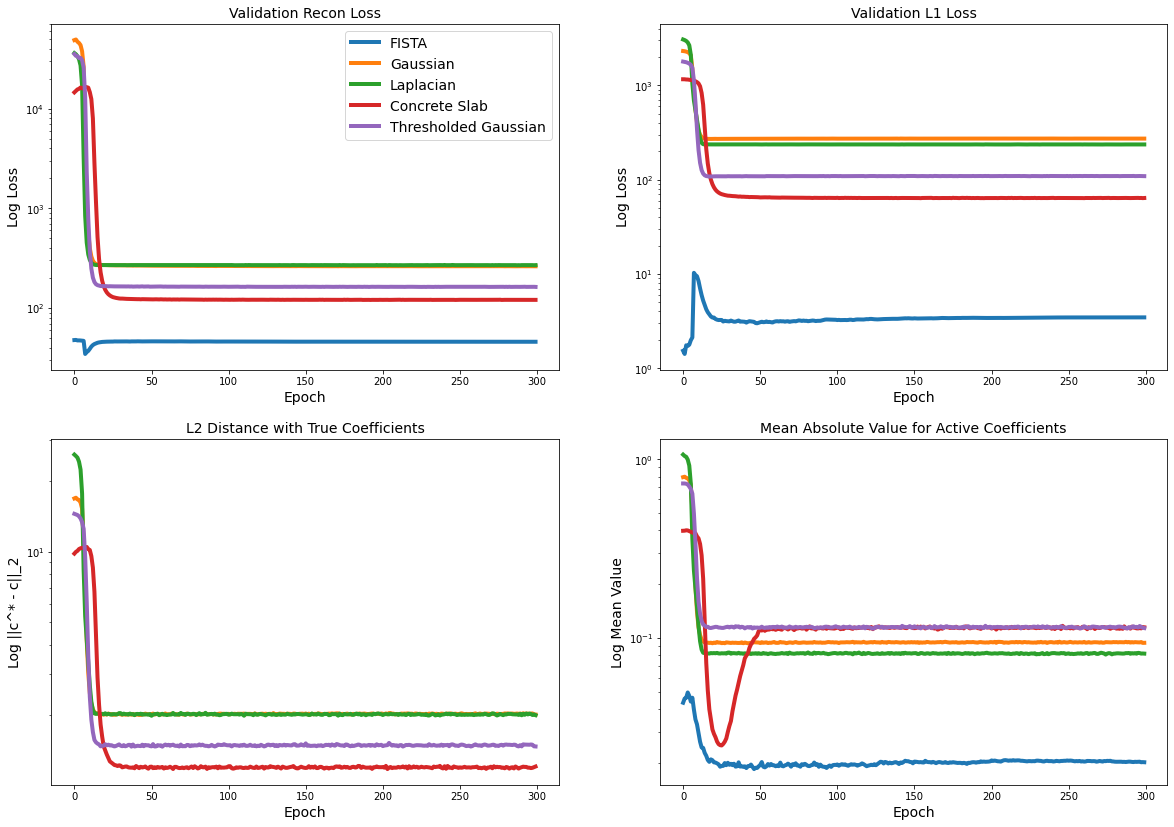

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for idx, label in enumerate(file_labels):
    if idx == 0:
        ax[0, 0].semilogy(val_true_recon[label], linewidth=4, label="FISTA")
        ax[0, 1].semilogy(val_true_l1[label], linewidth=4, label="FISTA")
        ax[1, 0].plot(np.zeros(len(coeff_est[label])), linewidth=4, label="FISTA")
        ax[1, 1].semilogy(np.abs(coeff_true[label]).sum(axis=(1, 2)) / np.count_nonzero(coeff_true[label], axis=(1, 2)), linewidth=4, label="FISTA")

    ax[0, 0].semilogy(val_recon[label], linewidth=4, label=label)
    ax[0, 1].semilogy(val_l1[label], linewidth=4, label=label)
    ax[1, 0].semilogy(np.linalg.norm(coeff_est[label] - coeff_true[label], axis=-1).mean(axis=1), linewidth=4, label=label)
    ax[1, 1].semilogy(np.abs(coeff_est[label]).sum(axis=(1, 2)) / np.count_nonzero(coeff_est[label], axis=(1, 2)), linewidth=4, label=label)

ax[0, 0].legend(fontsize=14)
ax[0, 0].set_title("Validation Recon Loss", fontsize=14)
ax[0, 0].set_xlabel("Epoch", fontsize=14)
ax[0, 0].set_ylabel("Log Loss", fontsize=14)

#ax[0, 1].legend(fontsize=14)
ax[0, 1].set_title("Validation L1 Loss", fontsize=14)
ax[0, 1].set_xlabel("Epoch", fontsize=14)
ax[0, 1].set_ylabel("Log Loss", fontsize=14)

#ax[1, 0].legend(fontsize=14)
ax[1, 0].set_title("L2 Distance with True Coefficients", fontsize=14)
ax[1, 0].set_xlabel("Epoch", fontsize=14)
ax[1, 0].set_ylabel("Log ||c^* - c||_2", fontsize=14)

ax[1, 1].legend(fontsize=14)
ax[1, 1].set_title("Mean Absolute Value for Active Coefficients", fontsize=14)
ax[1, 1].set_xlabel("Epoch", fontsize=14)
ax[1, 1].set_ylabel("Log Mean Value", fontsize=14)

(-0.1, 1.1)

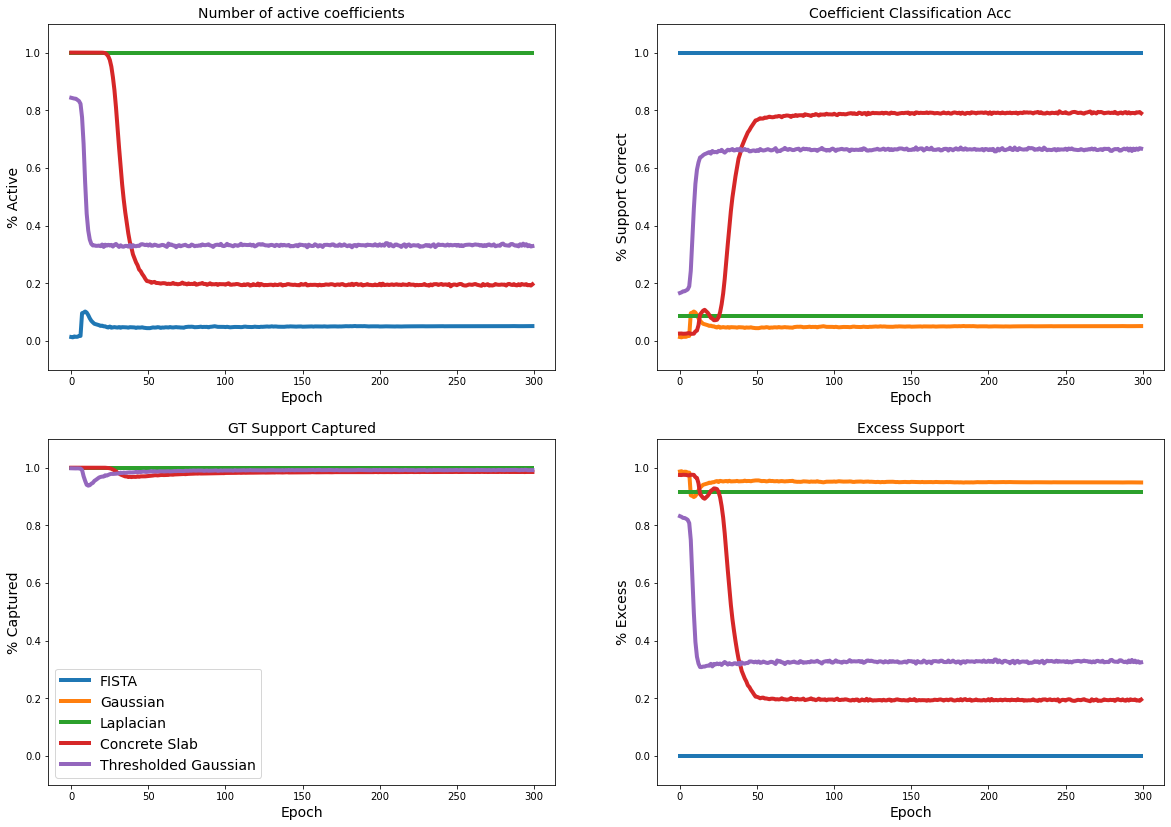

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for idx, label in enumerate(file_labels):
    if idx == 0:
        ax[0, 0].plot(true_active_coeff[label], linewidth=4, label="FISTA")
        ax[0, 1].plot(np.ones(len(classification_acc[label])), linewidth=4, label="FISTA")
        ax[1, 0].plot(np.ones(len(num_true_supp[label])), linewidth=4, label="FISTA")
        ax[1, 1].plot(np.zeros(len(num_true_supp[label])), linewidth=4, label="FISTA")        
    ax[0, 0].plot(est_active_coeff[label], linewidth=4, label=label)
    ax[0, 1].plot(classification_acc[label], linewidth=4, label=label)
    ax[1, 0].plot(num_true_supp[label], linewidth=4, label=label)
    ax[1, 1].plot(num_redundant_supp[label], linewidth=4, label=label)

#ax[0, 0].legend(fontsize=14)
ax[0, 0].set_title("Number of active coefficients", fontsize=14)
ax[0, 0].set_xlabel("Epoch", fontsize=14)
ax[0, 0].set_ylabel("% Active", fontsize=14)
ax[0, 0].set_ylim([-.1, 1.1])

#ax[0, 1].legend(fontsize=14)
ax[0, 1].set_title("Coefficient Classification Acc", fontsize=14)
ax[0, 1].set_xlabel("Epoch", fontsize=14)
ax[0, 1].set_ylabel("% Support Correct", fontsize=14)
ax[0, 1].set_ylim([-.1, 1.1])

ax[1, 0].legend(fontsize=14)
ax[1, 0].set_title("GT Support Captured", fontsize=14)
ax[1, 0].set_xlabel("Epoch", fontsize=14)
ax[1, 0].set_ylabel("% Captured", fontsize=14)
ax[1, 0].set_ylim([-.1, 1.1])

#ax[1, 1].legend(fontsize=14)
ax[1, 1].set_title("Excess Support", fontsize=14)
ax[1, 1].set_xlabel("Epoch", fontsize=14)
ax[1, 1].set_ylabel("% Excess", fontsize=14)
ax[1, 1].set_ylim([-.1, 1.1])


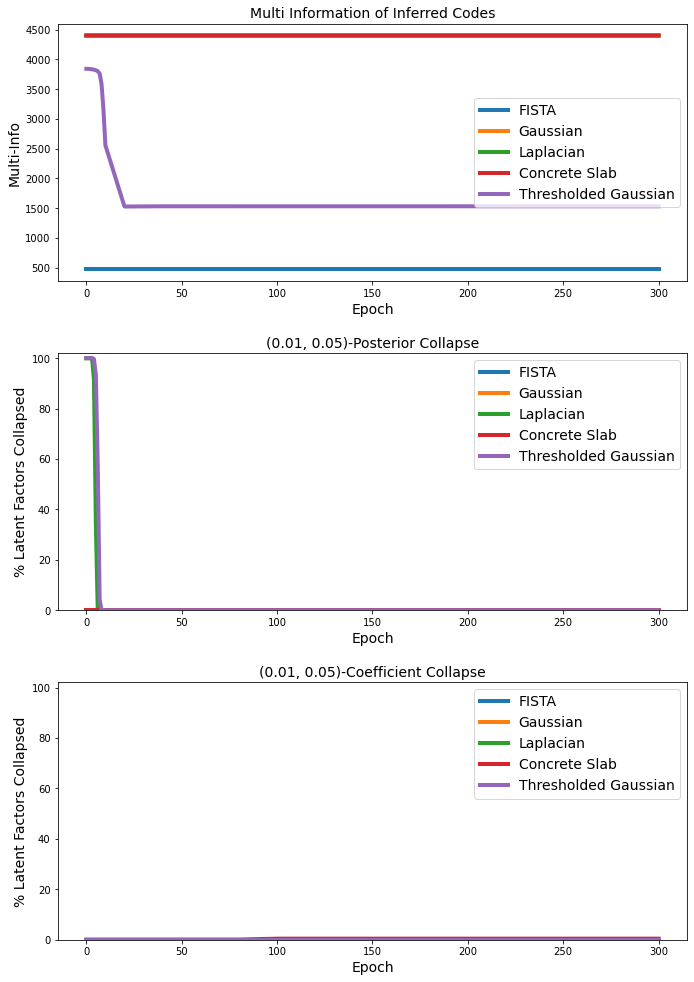

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 14))

for idx, label in enumerate(file_labels):
    if idx == 0:
        print()
        ax[0].plot(stat_step[label], 4.706e+02 * np.ones(len(multi_info[label])), linewidth=4, label="FISTA")
        ax[1].plot(stat_step[label], np.zeros(len(posterior_collapse[label])), linewidth=4, label="FISTA")
        ax[2].plot(stat_step[label], np.zeros(len(coeff_collapse[label])), linewidth=4, label="FISTA")
    ax[0].plot(stat_step[label], multi_info[label], linewidth=4, label=label)
    ax[1].plot(stat_step[label], posterior_collapse[label], linewidth=4, label=label)
    ax[2].plot(stat_step[label], coeff_collapse[label], linewidth=4, label=label)

ax[0].legend(fontsize=14)
ax[0].set_title("Multi Information of Inferred Codes", fontsize=14)
ax[0].set_xlabel("Epoch", fontsize=14)
ax[0].set_ylabel("Multi-Info", fontsize=14)

ax[1].legend(fontsize=14)
ax[1].set_title("(0.01, 0.05)-Posterior Collapse", fontsize=14)
ax[1].set_xlabel("Epoch", fontsize=14)
ax[1].set_ylabel("% Latent Factors Collapsed", fontsize=14)
ax[1].set_ylim([-.1, 102])

ax[2].legend(fontsize=14)
ax[2].set_title("(0.01, 0.05)-Coefficient Collapse", fontsize=14)
ax[2].set_xlabel("Epoch", fontsize=14)
ax[2].set_ylabel("% Latent Factors Collapsed", fontsize=14)
ax[2].set_ylim([-.1, 102])

fig.tight_layout(pad=2.0)



6.755999999999969
100.00000000000088
11.38999999999996
100.00000000000088


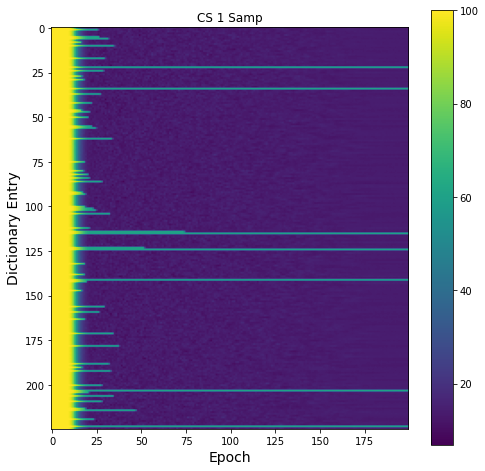

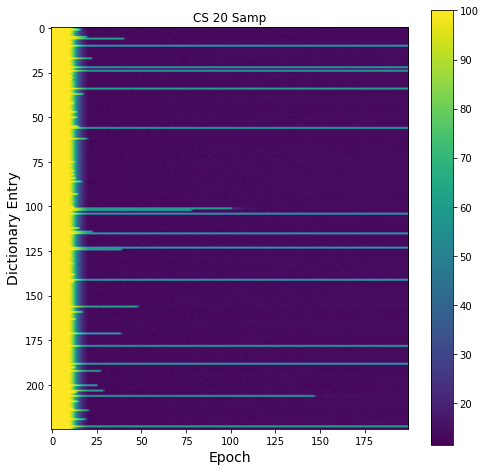

In [37]:
from matplotlib.colors import LogNorm

for idx, label in enumerate(file_labels):
    plt.figure(figsize=(8, 8))
    print(dictionary_use_dict[label].min())
    print(dictionary_use_dict[label].max())

    plt.imshow(dictionary_use_dict[label].T, vmin=1, vmax=100)#, norm=LogNorm(vmin=1, vmax=100))
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Dictionary Entry", fontsize=14)
    plt.title(label)
    plt.colorbar()